In [1]:
require 'cudnn'
require 'inn'
require 'image'

-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local file = io.open 'synset_words.txt'
  local list = {}
  while true do
    local line = file:read()
    if not line then break end
    table.insert(list, string.sub(line,11))
  end
  return list
end

-- Converts an image from RGB to BGR format and subtracts mean
function preprocess(im, img_mean)
  -- rescale the image
  local im3 = image.scale(im,224,224,'bilinear')*255
  -- RGB2BGR
  local im4 = im3:clone()
  im4[{1,{},{}}] = im3[{3,{},{}}]
  im4[{3,{},{}}] = im3[{1,{},{}}]

  -- subtract imagenet mean
  return im4 - image.scale(img_mean, 224, 224, 'bilinear')
end

-- Setting up networks 
print '==> Loading network'

--net = torch.load('/home/yusheng/Workspace/DeepLearning/models/zeilerNet/zeilerNet.net')
net = torch.load('/usr/local/data/zeilerNet/zeilerNet.net')
net:cuda()
-- as we want to classify, let's disable dropouts by enabling evaluation mode
net:evaluate()

print '==> Loading synsets'
synset_words = load_synset()

print '==> Loading image and imagenet mean'
--image_name = 'Goldfish3.jpg'
image_name = 'lena.jpg'
img_mean_name = 'ilsvrc_2012_mean.t7'

im = image.load(image_name)
img_mean = torch.load(img_mean_name).img_mean:transpose(3,1)

-- Have to resize and convert from RGB to BGR and subtract mean
print '==> Preprocessing'
I = preprocess(im, img_mean)

_,classes = net:forward(I:cuda()):view(-1):float():sort(true)

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i] ])
end



==> Loading network	


==> Loading synsets	


==> Loading image and imagenet mean	


==> Preprocessing	


predicted class 1: 	hair spray	
predicted class 2: 	brassiere, bra, bandeau	
predicted class 3: 	wig	
predicted class 4: 	maillot, tank suit	
predicted class 5: 	maillot	


In [2]:
print(net)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> output]
    (1): cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
    (2): cudnn.ReLU
    (3): inn.SpatialSameResponseNormalization
    (4): cudnn.SpatialMaxPooling
    (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
    (6): cudnn.ReLU
    (7): inn.SpatialSameResponseNormalization
    (8): cudnn.SpatialMaxPooling
    (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
    (10): cudnn.ReLU
    (11): cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
    (12): cudnn.ReLU
    (13): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
    (14): cudnn.ReLU
  }
  (2): inn.SpatialPyramidPooling
  (3): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
    (1): nn.Linear(12800 -> 4096)
    (2): cudnn.ReLU
    (3): nn.Dropout(0.500000)
    (4): nn.Linear(40

          padW : 1
                  nInputPlane : 3
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - size: 3x224x224
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41cc3328
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41cc8838
                  output_offset : 1161600
                  gradBias : CudaTensor - size: 96
                  algType : cdata<enum 761 [?]>: 0x407cab38
                  extraBuffer : CudaTensor - size: 147
                  extraBufferSizeInBytes : 588
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x407cc908
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40fd21a8
                  groups : 1
                  dH : 2
                  dW : 2
                  nOutputPlane : 96
                  bias : CudaTensor - size: 96
                  kH : 7
                  

weight_offset : 14112
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41746b98
                  input_offset : 150528
                  weight : CudaTensor - size: 96x3x7x7
                  train : false
                  gradWeight : CudaTensor - size: 96x3x7x7
                  fgradInput : CudaTensor - empty
                  kW : 7
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40fdd6e8
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 96x110x110
        

          gradInput : CudaTensor - empty
                  nElem : 1161600
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41e13448
                }
              3 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - empty
                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1)
      |      (4): nn.MulConstant
      |      (5): nn.AddConstant
      |      (6): nn.Power
      |    }
       ... -> output
  }
  (

            gradInput : CudaTensor - size: 96x110x110
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41ef02e8
                  iSize : LongStorage - size: 4
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x417472a0
                  poolDesc : cdata<struct cudnnPoolingStruct *[1]>: 0x41dfe3e8
                  mode : CUDNN_POOLING_MAX
                  train : false
                  kW : 3
                  ceil_mode : true
                  padW : 0
                  output : CudaTensor - size: 96x55x55
                  kH : 3
                }
              5 : 
                cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
                {
                  padW : 0
                  nInputPlane : 96
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - size: 96x55x55
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x402168f8
          

        iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41d4ae00
                  output_offset : 173056
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x41efb010
                  extraBuffer : CudaTensor - size: 2400
                  extraBufferSizeInBytes : 9600
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4174b998
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4174d3b0
                  groups : 1
                  dH : 2
                  dW : 2
                  nOutputPlane : 256
                  bias : CudaTensor - size: 256
                  kH : 5
                  weight_offset : 614400
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41f043c0
                  input_offset : 290400
                  weight : CudaTensor - size: 256x96x5x5
              

                  gradWeight : CudaTensor - size: 256x96x5x5
                  fgradInput : CudaTensor - empty
                  kW : 5
                  padH : 0
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x4175b678
                }
              6 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - empty
                  nElem : 173056
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407fe8c8
                }
              7 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - empty


                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1)
      |      (4): nn.MulConstant
      |      (5): nn.AddConstant
      |      (6): nn.Power
      |    }
       ... -> output
  }
  (2): nn.CDivTable
}
                }
              8 : 
                cudnn.SpatialMaxPooling
                {
                  dH : 2
                  dW : 2
                  padH : 0
                  gradInput : CudaTensor - size: 256x26x26
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x415d10a8
                  iSize : LongStorage - size: 4
                  iDesc : cdata<struct cudnnTensorStru

                  padW : 0
                  output : CudaTensor - size: 256x13x13
                  kH : 3
                }
              9 : 
                cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 256
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 256x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x408e5bf8
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x408116d8
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
                  algType : cdata<enum 761 [?]>: 0x417512f0
                  extraBuffer : CudaTensor - size: 2304
                  extraBufferSizeInBytes : 9216
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4174eb50


                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41746550
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 884736
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41d3d818
                  input_offset : 43264
                  weight : CudaTensor - size: 384x256x3x3
                  train : false
                  gradWeight : CudaTensor - size: 384x256x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x40d5af10
                }
              10 : 
         

       cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41eeba60
                }
              11 : 
                cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41cc8328
              

    iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40fda8b8
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
                  algType : cdata<enum 761 [?]>: 0x41dfafb0
                  extraBuffer : CudaTensor - size: 3456
                  extraBufferSizeInBytes : 13824
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x4040a460
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407bf8b8
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 1327104
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40922c58
                  input_offset : 64896
                  weight : CudaTensor - size: 384x384x3x3
   

               train : false
                  gradWeight : CudaTensor - size: 384x384x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x41df5a70
                }
              12 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407ff368
                }
              13 : 
                cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
                {
                  

padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40803cc0
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x41ef9318
                  output_offset : 43264
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x4040c2b8
                  extraBuffer : CudaTensor - size: 3456
                  extraBufferSizeInBytes : 13824
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x41cc7988
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40ed67f0
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 256
                  bias : CudaTensor - size: 256
                  kH : 3
                  weight_offset

          biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41e11960
                  input_offset : 64896
                  weight : CudaTensor - size: 256x384x3x3
                  train : false
                  gradWeight : CudaTensor - size: 256x384x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x41e13a70
                }
              14 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - empty
                  nElem : 43264
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40fe2250
                }
            }
          train : false
          output : CudaTensor - size: 256x13x13
        }


      2 : 
        inn.SpatialPyramidPooling
        {
          pyr : 
            {
              1 : 
                {
                  1 : 1
                  2 : 1
                }
              2 : 
                {
                  1 : 2
                  2 : 2
                }
              3 : 
                {
                  1 : 3
                  2 : 3
                }
              4 : 
                {
                  1 : 6
                  2 : 6
                }
            }
          train : false


          output : CudaTensor - size: 12800
          gradInput : CudaTensor - empty
          module : 
            nn.Concat {
              input
                |`-> (1): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (2): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (3): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (4): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }

        nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
          (1): nn.Linear(12800 -> 4096)
          (2): cudnn.ReLU
          (3): nn.Dropout(0.500000)
          (4): nn.Linear(4096 -> 4096)
          (5): cudnn.ReLU
          (6): nn.Dropout(0.500000)
          (7): nn.Linear(4096 -> 1000)
        }
        {
          gradInput : CudaTensor - empty
          modules : 
            {
              1 : 
                nn.Linear(12800 -> 4096)
                {
                  gradBias : CudaTensor - size: 4096
                  weight : CudaTensor - size: 4096x12800
                  train : false
                  bias : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                  gradWeight : CudaTensor - size: 4096x12800
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
                

 output : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x411101a0
                }
              3 : 
                nn.Dropout(0.500000)
                {
                  v2 : false
                  noise : CudaTensor - empty
                  train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              4 : 
                nn.Linear(4096 -> 4096)
                {
                  gradBias : CudaTensor - size: 4096
                  weight : CudaTensor - size: 4096x4096
                  train : false
            

      bias : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                  gradWeight : CudaTensor - size: 4096x4096
                }
              5 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41cb9ee0
                }
              6 : 
                nn.Dropout(0.500000)
                {
                  v2 : false
                  noise : CudaTensor - empty
              

    train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              7 : 
                nn.Linear(4096 -> 1000)
                {
                  gradBias : CudaTensor - size: 1000
                  weight : CudaTensor - size: 1000x4096
                  train : false
                  bias : CudaTensor - size: 1000
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 1000
                  gradWeight : CudaTensor - size: 1000x4096
                }
            }
          train : false
          output : CudaTensor - size: 1000
        }
    }
  train : false
  output : CudaTensor - size: 1000
}



 256
  13
  13
[torch.LongStorage of size 3]




   1
 384
  13
  13
[torch.LongStorage of size 4]

==> Time elapsed: 0.14228510856628 seconds	


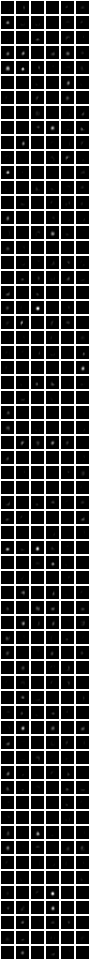

In [2]:
require 'modules/SpatialDeconvolution'
require 'modules/SpatialUnPooling'

conv5_fm = net:get(1):get(13).output
print(conv5_fm:size())
timer = torch.Timer()
deconv5 = cudnn.SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), 211 )
conv4_fm_c5 = deconv5:forward(conv5_fm)
conv4_fm_c5 = cudnn.ReLU(true):forward(conv4_fm_c5)
print(conv4_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image( conv4_fm_c5[1] )


 384
  13
  13
[torch.LongStorage of size 3]

==> Time elapsed: 9.5969941616058 seconds	


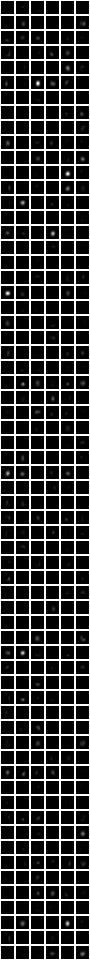

In [3]:
timer = torch.Timer()
deconv4 = cudnn.SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true )
conv3_fm_c5 = deconv4:forward(conv4_fm_c5[1])
conv3_fm_c5 = cudnn.ReLU(true):forward(conv3_fm_c5)
print(conv3_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(conv3_fm_c5 )


 256
  13
  13
[torch.LongStorage of size 3]

==> Time elapsed: 6.4798350334167 seconds	


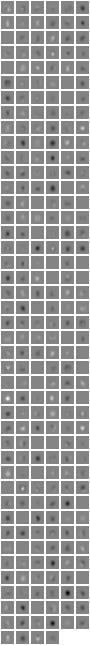

In [4]:
timer = torch.Timer()
deconv3 = cudnn.SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true )
pool2_fm_c5 = deconv3:forward(conv3_fm_c5)
print(pool2_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(pool2_fm_c5)


 256
  26
  26
[torch.LongStorage of size 3]

==> Time elapsed: 1.1964797973633 seconds	


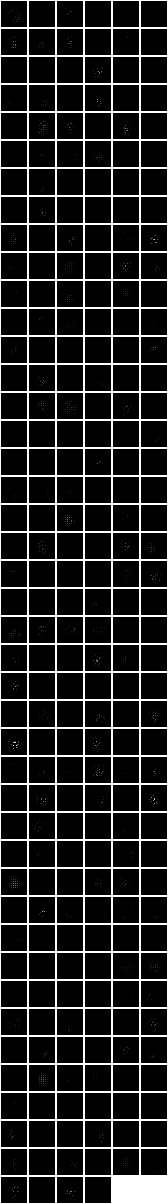

In [5]:
timer = torch.Timer()
unpool2 = cudnn.SpatialUnPooling(net:get(1):get(8), net:get(1):get(7).output )
conv2_fm_c5 = unpool2:forward(pool2_fm_c5)
conv2_fm_c5 = cudnn.ReLU(true):forward(conv2_fm_c5)
print(conv2_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(conv2_fm_c5)


 96
 55
 55
[torch.LongStorage of size 3]

==> Time elapsed: 1.8360838890076 seconds	


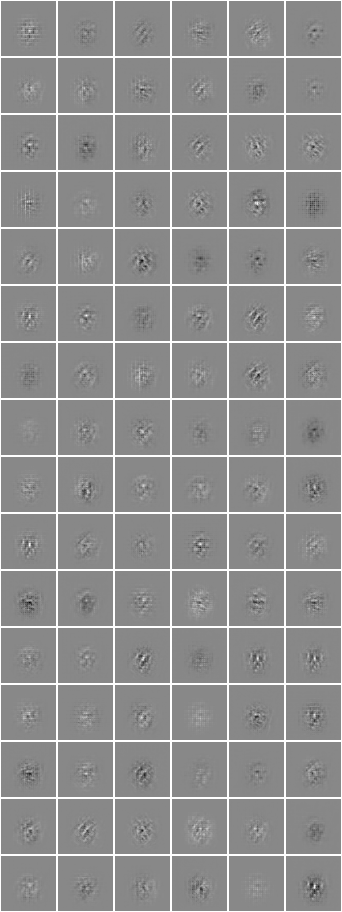

In [6]:
timer = torch.Timer()
deconv2 = cudnn.SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true )
pool1_fm_c5 = deconv2:forward(conv2_fm_c5)
print(pool1_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(pool1_fm_c5)


  96
 110
 110
[torch.LongStorage of size 3]

==> Time elapsed: 7.1626570224762 seconds	


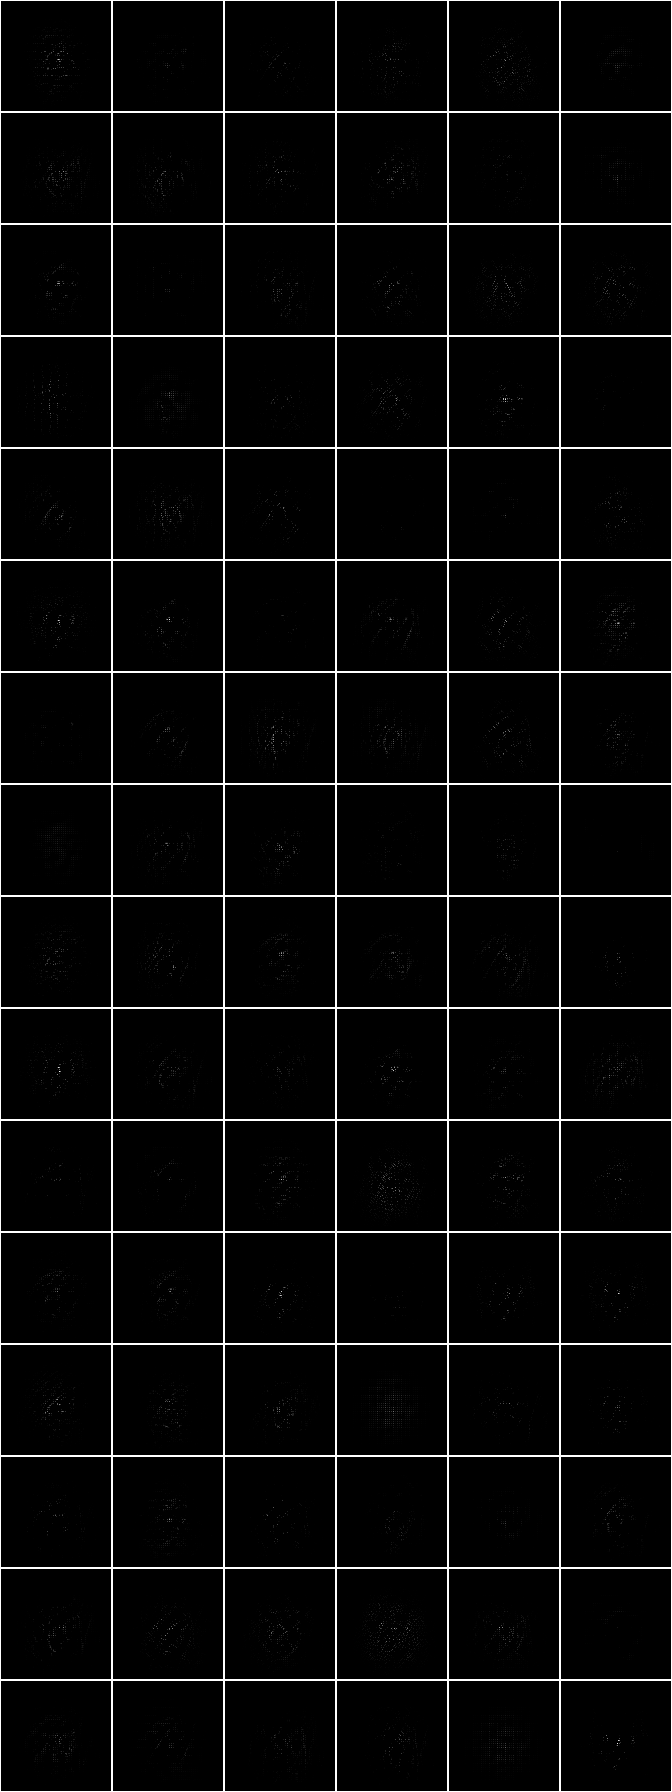

In [7]:
timer = torch.Timer()
unpool1 = cudnn.SpatialUnPooling(net:get(1):get(4), net:get(1):get(3).output )
conv1_fm_c5 = unpool1:forward(pool1_fm_c5)
conv1_fm_c5 = cudnn.ReLU(true):forward(conv1_fm_c5)
print(conv1_fm_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(conv1_fm_c5)


   3
 224
 224
[torch.LongStorage of size 3]

==> Time elapsed: 0.19860100746155 seconds	


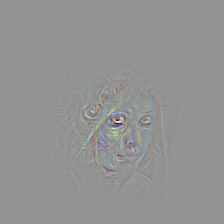

In [8]:
timer = torch.Timer()
deconv1 = cudnn.SpatialDeconvolution( net:get(1):get(1), I:size(2), true )
vis_c5 = deconv1:forward(conv1_fm_c5)
print(vis_c5:size())
print('==> Time elapsed: ' .. timer:time().real .. ' seconds')
itorch.image(vis_c5)

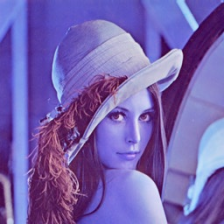

In [11]:
itorch.image(I)